# 1: Damaged or not

In [53]:
import numpy as np
from numpy import asarray
import os
import pandas as pd
import random
import urllib.request
from IPython.display import Image

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import image
from matplotlib import pyplot
import seaborn as sns
sns.set_style("whitegrid")
from PIL import Image , ImageFont

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import ZeroPadding2D, Dropout 
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16 ,Xception ,ResNet50 ,MobileNet ,DenseNet121 ,EfficientNetB1, VGG19, InceptionV3, mobilenet_v2

## Data Reading

##### Reading damaged cars

In [5]:
list_images_damaged = []
name_damaged = []
for dirname, _, filenames in os.walk("C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Damage"):
    for filename in filenames:
        list_images_damaged.append(os.path.join(dirname, filename))
        name_damaged.append(filename)

In [6]:
list_images_damaged

['C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Damage\\0.jpeg',
 'C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Damage\\0001.JPEG',
 'C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Damage\\0002.JPEG',
 'C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Damage\\0003.JPEG',
 'C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Damage\\0004.JPEG',
 'C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Damage\\0005.JPEG',
 'C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Damage\\0006.JPEG',
 'C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Damage\\0007.JPEG',
 'C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Damage\\0008.JPEG',
 'C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Damage\\0009.JPEG',
 'C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Damage\\0010.JPEG',
 'C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Damage\\0011.JPEG',
 'C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Damage\\0012.JPEG',
 'C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Damage\\0013.JPEG',
 'C:\\Use

> ##### plotting damaged cars

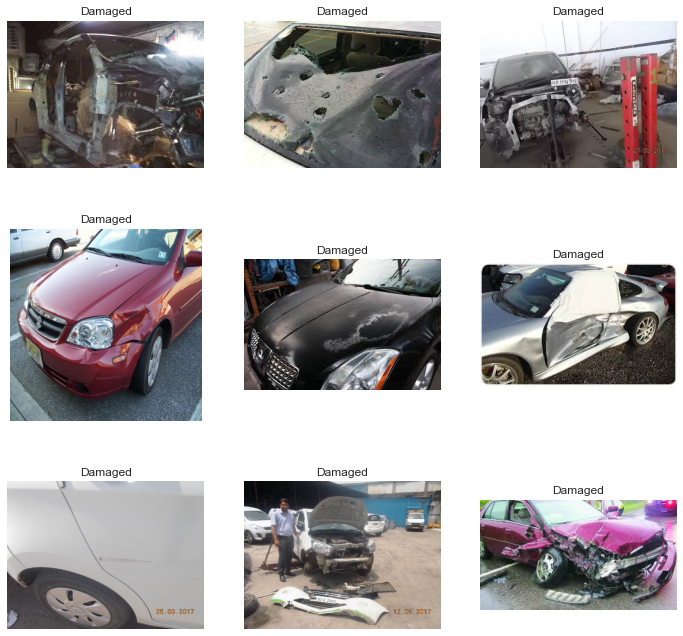

In [7]:
damaged = list_images_damaged
plt.figure(figsize=(12, 12))
ran_num = []
for i in range(0,9):
    n = random.randint(0,len(damaged))
    ran_num.append(n)
for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(damaged[ran_num[i]]))
    plt.title("Damaged")
    plt.axis("off")

> ##### Saving the damaged list into a dataframe

In [8]:
df_damaged = pd.DataFrame()
df_damaged["File_Name"] = name_damaged
df_damaged["Class"] = "Damaged"

In [9]:
df_damaged.head()

,File_Name,Class
0,0.jpeg,Damaged
1,0001.JPEG,Damaged
2,0002.JPEG,Damaged
3,0003.JPEG,Damaged
4,0004.JPEG,Damaged


In [10]:
df_damaged.info

<bound method DataFrame.info of                                               File_Name    Class
0                                                0.jpeg  Damaged
1                                             0001.JPEG  Damaged
2                                             0002.JPEG  Damaged
3                                             0003.JPEG  Damaged
4                                             0004.JPEG  Damaged
...                                                 ...      ...
2535  vehicle-car-bumper-dent-taillight-broken-colli...  Damaged
2536  vehicle-car-bumper-dent-taillight-broken-colli...  Damaged
2537  vehicle-car-bumper-dented-broken-collision-cra...  Damaged
2538  vehicle-car-bumper-dented-broken-collision-cra...  Damaged
2539  vehicle-car-bumper-dented-broken-collision-cra...  Damaged

[2540 rows x 2 columns]>

##### Reading no damage cars

In [11]:
list_images_whole = []
name_whole = []
for dirname_2, _, filenames_2 in os.walk("C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Whole"):
    for filename in filenames_2:
        list_images_whole.append(os.path.join(dirname_2, filename))
        name_whole.append(filename)

In [12]:
list_images_whole

['C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Whole\\0001.jpg',
 'C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Whole\\0002.jpg',
 'C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Whole\\0003.jpg',
 'C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Whole\\0004.jpg',
 'C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Whole\\0005.jpg',
 'C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Whole\\0006.jpg',
 'C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Whole\\0007.jpg',
 'C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Whole\\0008.jpg',
 'C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Whole\\0009.jpg',
 'C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Whole\\0010.jpg',
 'C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Whole\\0011.jpg',
 'C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Whole\\0012.jpg',
 'C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Whole\\0013.jpg',
 'C:\\Users\\abdul\\OneDrive\\Desktop\\DL\\Images\\Whole\\0014.jpg',
 'C:\\Users\\abdul\\OneDrive\\Desk

> ##### Plotting no damage cars

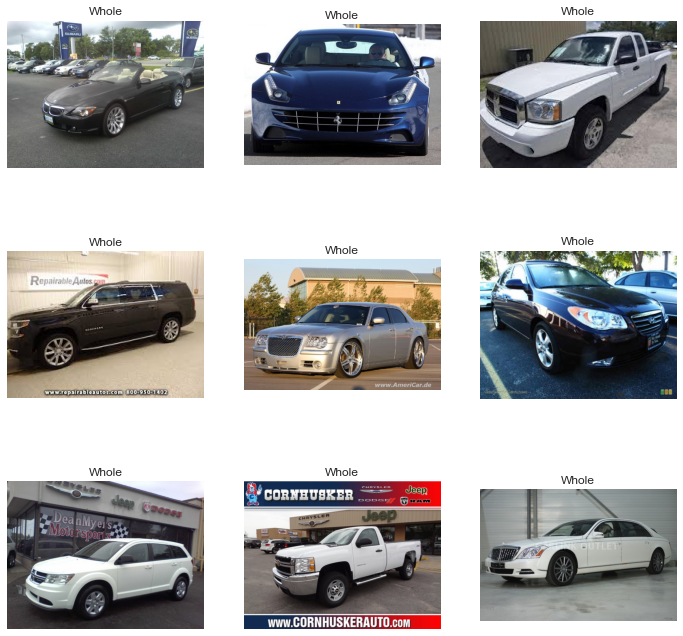

In [13]:
whole = list_images_whole
plt.figure(figsize=(12, 12))
ran_num = []
for i in range(0,9):
    n = random.randint(0,len(whole))
    ran_num.append(n)
for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(whole[ran_num[i]]))
    plt.title("Whole")
    plt.axis("off")

> ##### Saving the not damaged cars list into a dataframe

In [14]:
df_whole = pd.DataFrame()
df_whole["File_Name"] = name_whole
df_whole["Class"] = "Whole"

In [15]:
df_whole.head()

,File_Name,Class
0,0001.jpg,Whole
1,0002.jpg,Whole
2,0003.jpg,Whole
3,0004.jpg,Whole
4,0005.jpg,Whole


In [16]:
df_whole.info

<bound method DataFrame.info of         File_Name  Class
0        0001.jpg  Whole
1        0002.jpg  Whole
2        0003.jpg  Whole
3        0004.jpg  Whole
4        0005.jpg  Whole
...           ...    ...
2535  v2 (95).jpg  Whole
2536  v2 (96).jpg  Whole
2537  v2 (97).jpg  Whole
2538  v2 (98).jpg  Whole
2539  v2 (99).jpg  Whole

[2540 rows x 2 columns]>

> ##### Now, we will concat the dataframes (Whole & Damage) into one dataframe.

In [17]:
df_all = pd.concat([df_damaged, df_whole], ignore_index=True)
df_all

,File_Name,Class
0,0.jpeg,Damaged
1,0001.JPEG,Damaged
2,0002.JPEG,Damaged
3,0003.JPEG,Damaged
4,0004.JPEG,Damaged
...,...,...
5075,v2 (95).jpg,Whole
5076,v2 (96).jpg,Whole
5077,v2 (97).jpg,Whole
5078,v2 (98).jpg,Whole


## Prepare Images for modeling

In [18]:
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    x = image.img_to_array(img)
    return x

In [19]:
images = []
labels = []
files_path = "C:/Users/abdul/OneDrive/Desktop/DL/Images"
directory = os.fsencode(files_path)

for folder in os.listdir(directory):
    label = os.fsdecode(folder)
    for img in os.listdir(f'C:/Users/abdul/OneDrive/Desktop/DL/Images/{label}'):
        img_name = os.fsdecode(img)
        images.append(prepare_image(f'C:/Users/abdul/OneDrive/Desktop/DL/Images/{label}/{img_name}'))
        labels.append(label)

In [20]:
labeling = [int(labels[w].replace('Whole', "0").replace("Damage",'1')) for w in range(len(labels))]

In [21]:
X_digits, Y_digits = images, labeling

In [22]:
X = np.array(X_digits)
Y = to_categorical(Y_digits, num_classes=2)

In [23]:
X.shape, Y.shape

((5080, 128, 128, 3), (5080, 2))

## Data splitting

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .1, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .1111, random_state = 42)

> ##### Shape of each dataframe

In [150]:
X_train.shape

(4064, 128, 128, 3)

In [151]:
X_val.shape

(508, 128, 128, 3)

In [152]:
X_test.shape

(508, 128, 128, 3)

## Modeling

> ### Logistic Regression

>> We used Logistic Regression model as a baseline model

In [28]:
X_train_bl = X_train.reshape(4064,128*128*3)
X_val_bl = X_val.reshape(508,128*128*3)

In [29]:
lr = LogisticRegression()
lr.fit(X_train_bl, y_train)
print('The accuracy for training : ',lr.score(X_train_bl,y_train))
print('The accuracy for validation: ',lr.score(X_val_bl,y_val))

C:\Users\abdul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy for training :  1.0
The accuracy for validation:  0.7007874015748031


> ### Simple NN Model

>> First try with basic NN model 

In [140]:
NN_01 = Sequential([
                    InputLayer(input_shape = X_train.shape[1:]),
                    Flatten(),
                    Dense(40, activation='relu'),
                    Dense(2, activation='softmax')])

NN_01.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

NN_01.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

NN_01_model = NN_01.fit(X_train, y_train_cat, epochs=5, verbose=1, validation_data=(X_val,y_val))

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_39 (Flatten)        (None, 49152)             0         
                                                                 
 dense_115 (Dense)           (None, 40)                1966120   
                                                                 
 dense_116 (Dense)           (None, 2)                 82        
                                                                 
Total params: 1,966,202
Trainable params: 1,966,202
Non-trainable params: 0
_________________________________________________________________
 
------------------------------------------------------------------------------
 
Epoch 1/5
127/127 [==============================] - 2s 12ms/step - loss: 5670.5464 - accuracy: 0.4877 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
127/127 [==============================] - 1s 10ms/step - loss: 0.693

>> Second try, we will increase the first dense layer to have 500 neural

In [141]:
NN_02 = Sequential([
                    InputLayer(input_shape = X_train.shape[1:]),
                    Flatten(),
                    Dense(500, activation='relu'),
                    Dense(2, activation='softmax')])

NN_02.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NN_02.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

NN_02_model = NN_02.fit(X_train, y_train_cat, epochs=5, verbose=1, validation_data=(X_val,y_val))

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_40 (Flatten)        (None, 49152)             0         
                                                                 
 dense_117 (Dense)           (None, 500)               24576500  
                                                                 
 dense_118 (Dense)           (None, 2)                 1002      
                                                                 
Total params: 24,577,502
Trainable params: 24,577,502
Non-trainable params: 0
_________________________________________________________________
 
------------------------------------------------------------------------------
 
Epoch 1/5
127/127 [==============================] - 12s 93ms/step - loss: 1127.2133 - accuracy: 0.5824 - val_loss: 122.7277 - val_accuracy: 0.6516
Epoch 2/5
127/127 [==============================] - 11s 89ms/step - loss:

>> Third try, now we will change the activation function from relu to tanh

In [142]:
NN_03 = Sequential([
                    InputLayer(input_shape = X_train.shape[1:]),
                    Flatten(),
                    Dense(500, activation='tanh'),
                    Dense(2, activation='softmax')])

NN_03.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NN_03.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

NN_03_model = NN_03.fit(X_train, y_train_cat, epochs=5, verbose=1, validation_data=(X_val,y_val))

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_41 (Flatten)        (None, 49152)             0         
                                                                 
 dense_119 (Dense)           (None, 500)               24576500  
                                                                 
 dense_120 (Dense)           (None, 2)                 1002      
                                                                 
Total params: 24,577,502
Trainable params: 24,577,502
Non-trainable params: 0
_________________________________________________________________
 
------------------------------------------------------------------------------
 
Epoch 1/5
127/127 [==============================] - 12s 90ms/step - loss: 0.7706 - accuracy: 0.5042 - val_loss: 0.7031 - val_accuracy: 0.5000
Epoch 2/5
127/127 [==============================] - 11s 88ms/step - loss: 0.70

>> without activation function 

In [143]:
NN_04 = Sequential([
                    InputLayer(input_shape = X_train.shape[1:]),
                    Flatten(),
                    Dense(500),
                    Dense(2, activation='softmax')])

NN_04.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NN_04.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

NN_04_model = NN_04.fit(X_train, y_train_cat, epochs=5, verbose=1, validation_data=(X_val,y_val))

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_42 (Flatten)        (None, 49152)             0         
                                                                 
 dense_121 (Dense)           (None, 500)               24576500  
                                                                 
 dense_122 (Dense)           (None, 2)                 1002      
                                                                 
Total params: 24,577,502
Trainable params: 24,577,502
Non-trainable params: 0
_________________________________________________________________
 
------------------------------------------------------------------------------
 
Epoch 1/5
127/127 [==============================] - 12s 92ms/step - loss: 3433.0481 - accuracy: 0.6014 - val_loss: 345.8873 - val_accuracy: 0.5571
Epoch 2/5
127/127 [==============================] - 12s 94ms/step - loss:

>> Fifth try, we will increase the neurals in the dense layer to 1000, using relu as an activation function

In [144]:
NN_05 = Sequential([
                    InputLayer(input_shape = X_train.shape[1:]),
                    Flatten(),
                    Dense(1000, activation='relu'),
                    Dense(2, activation='softmax')])

NN_05.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NN_05.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

NN_05_model = NN_05.fit(X_train, y_train_cat, epochs=5, verbose=1, validation_data=(X_val,y_val))

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_43 (Flatten)        (None, 49152)             0         
                                                                 
 dense_123 (Dense)           (None, 1000)              49153000  
                                                                 
 dense_124 (Dense)           (None, 2)                 2002      
                                                                 
Total params: 49,155,002
Trainable params: 49,155,002
Non-trainable params: 0
_________________________________________________________________
 
------------------------------------------------------------------------------
 
Epoch 1/5
127/127 [==============================] - 21s 163ms/step - loss: 1511.5692 - accuracy: 0.5903 - val_loss: 37.7756 - val_accuracy: 0.7028
Epoch 2/5
127/127 [==============================] - 20s 161ms/step - loss

>> Sixth try, we will increase the neurals in the dense layer to 1500, using relu as an activation function

In [145]:
NN_06 = Sequential([
                    InputLayer(input_shape = X_train.shape[1:]),
                    Flatten(),
                    Dense(1500, activation='relu'),
                    Dense(2, activation='softmax')])

NN_06.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NN_06.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

NN_06_model = NN_06.fit(X_train, y_train_cat, epochs=5, verbose=1, validation_data=(X_val,y_val))

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_44 (Flatten)        (None, 49152)             0         
                                                                 
 dense_125 (Dense)           (None, 1500)              73729500  
                                                                 
 dense_126 (Dense)           (None, 2)                 3002      
                                                                 
Total params: 73,732,502
Trainable params: 73,732,502
Non-trainable params: 0
_________________________________________________________________
 
------------------------------------------------------------------------------
 
Epoch 1/5
127/127 [==============================] - 32s 249ms/step - loss: 2008.5331 - accuracy: 0.5908 - val_loss: 230.9629 - val_accuracy: 0.5551
Epoch 2/5
127/127 [==============================] - 32s 248ms/step - los

>> Now, we will try to add more layers

In [146]:
NN_07 = Sequential([
                    InputLayer(input_shape = X_train.shape[1:]),
                    Flatten(),
                    Dense(500, activation='relu'),
                    Dense(250, activation='relu'),
                    Dense(2, activation='softmax')])

NN_07.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NN_07.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

NN_07_model = NN_07.fit(X_train, y_train_cat, epochs=5, verbose=1, validation_data=(X_val,y_val))

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_45 (Flatten)        (None, 49152)             0         
                                                                 
 dense_127 (Dense)           (None, 500)               24576500  
                                                                 
 dense_128 (Dense)           (None, 250)               125250    
                                                                 
 dense_129 (Dense)           (None, 2)                 502       
                                                                 
Total params: 24,702,252
Trainable params: 24,702,252
Non-trainable params: 0
_________________________________________________________________
 
------------------------------------------------------------------------------
 
Epoch 1/5
127/127 [==============================] - 12s 95ms/step - loss: 804.1213 - accu

>> Adding more layers too

In [147]:
NN_08 = Sequential([
                    InputLayer(input_shape = X_train.shape[1:]),
                    Flatten(),
                    Dense(500, activation='relu'),
                    Dense(250, activation='relu'),
                    Dense(125, activation='relu'),
                    Dense(75, activation='relu'),
                    Dense(2, activation='softmax')])

NN_08.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NN_08.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

NN_08_model = NN_08.fit(X_train, y_train_cat, epochs=5, verbose=1, validation_data=(X_val,y_val))

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_46 (Flatten)        (None, 49152)             0         
                                                                 
 dense_130 (Dense)           (None, 500)               24576500  
                                                                 
 dense_131 (Dense)           (None, 250)               125250    
                                                                 
 dense_132 (Dense)           (None, 125)               31375     
                                                                 
 dense_133 (Dense)           (None, 75)                9450      
                                                                 
 dense_134 (Dense)           (None, 2)                 152       
                                                                 
Total params: 24,742,727
Trainable params: 24,742,727

>> #### We tried with NN model, eight times: the best one between them was number 4

> ### CNN model

>> First, we will try CNN model without dropout

In [148]:
CNN_01 = Sequential([
                     InputLayer(input_shape=X_train.shape[1:]),
                     Conv2D(filters=16, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(500, activation='relu'),
                     Dense(2, activation='softmax')])

CNN_01.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

CNN_01.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

CNN_01_model = CNN_01.fit(X_train, y_train_cat, epochs=10, verbose=1, validation_data=(X_val,y_val))

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_334 (Conv2D)         (None, 128, 128, 16)      1216      
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_335 (Conv2D)         (None, 64, 64, 32)        12832     
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 flatten_47 (Flatten)        (None, 32768)             0         
                                                                 
 dense_135 (Dense)           (None, 500)             

>> CNN with dropout 50%

In [154]:
CNN_02 = Sequential([
                     InputLayer(input_shape=X_train.shape[1:]),
                     Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=64, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=128, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(512, activation='relu'),
                     Dropout(0.5),
                     Dense(2, activation='softmax')])

CNN_02.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

CNN_02.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

CNN_02_model = CNN_02.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_val,y_val))

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_339 (Conv2D)         (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_340 (Conv2D)         (None, 64, 64, 64)        51264     
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_341 (Conv2D)         (None, 32, 32, 128)       204928    
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, 16, 16, 128)    

>> CNN with a regularizer

In [158]:
CNN_03 = Sequential([
                     InputLayer(input_shape=X_train.shape[1:]),
                     Conv2D(filters=32, 
                            kernel_size=5, 
                            activation='relu', 
                            padding='same',
                            kernel_regularizer=keras.regularizers.l2(0.001)),
                     MaxPooling2D(),
                     Conv2D(filters=64, 
                            kernel_size=5, 
                            activation='relu', 
                            padding='same', 
                            kernel_regularizer=keras.regularizers.l2(0.001)),
                     MaxPooling2D(),
                     Conv2D(filters=128, 
                            kernel_size=5, 
                            activation='relu', 
                            padding='same', 
                            kernel_regularizer=keras.regularizers.l2(0.001)),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(512, 
                           activation='relu', 
                           kernel_regularizer=keras.regularizers.l2(0.001)),
                     Dense(2, activation='softmax')])

CNN_03.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

CNN_03.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

CNN_03_model = CNN_03.fit(X_train, y_train, epochs=10, verbose=1,  validation_data=(X_val, y_val))

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_351 (Conv2D)         (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d_81 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_352 (Conv2D)         (None, 64, 64, 64)        51264     
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_353 (Conv2D)         (None, 32, 32, 128)       204928    
                                                                 
 max_pooling2d_83 (MaxPoolin  (None, 16, 16, 128)    

>> CNN with more dense layers and dropout

In [159]:
CNN_04 = Sequential([
                     InputLayer(input_shape=X_train.shape[1:]),
                     Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=64, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=128, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(256, activation='relu'),
                     Dropout(0.2),
                     Dense(512, activation='relu'),
                     Dropout(0.2),
                     Dense(2, activation='softmax')])

CNN_04.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

CNN_04.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

CNN_04_model = CNN_04.fit(X_train, y_train, epochs=10, verbose=1, batch_size=300, validation_data=(X_val,y_val))

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_354 (Conv2D)         (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d_84 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_355 (Conv2D)         (None, 64, 64, 64)        51264     
                                                                 
 max_pooling2d_85 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_356 (Conv2D)         (None, 32, 32, 128)       204928    
                                                                 
 max_pooling2d_86 (MaxPoolin  (None, 16, 16, 128)    

>> #### Early stopping, ReduceLROnPlateau, Checkpoint

In [26]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, min_delta=0.001)
lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', verbose=1, patience=3, factor=0.6, min_lr=0.0001)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.hdf5', monitor='val_accuracy', verbose=1,save_best_only=True,mode='max')

callbacks = [early_stopping, lr_reduction, model_checkpoint]

>> Using Early stopping, ReduseLROnPlataeu, checkpoint

In [161]:
CNN_05 = Sequential([
                     InputLayer(input_shape=X_train.shape[1:]),
                     Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=64, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=128, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(256, activation='relu'),
                     Dropout(0.05),
                     Dense(512, activation='relu'),
                     Dropout(0.05),
                     Dense(2, activation='softmax')])

CNN_05.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

CNN_05.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

CNN_05_model = CNN_05.fit(X_train, y_train, epochs=30, verbose=1, batch_size=128, validation_data=(X_val,y_val), callbacks=callbacks)


Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_357 (Conv2D)         (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d_87 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_358 (Conv2D)         (None, 64, 64, 64)        51264     
                                                                 
 max_pooling2d_88 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_359 (Conv2D)         (None, 32, 32, 128)       204928    
                                                                 
 max_pooling2d_89 (MaxPoolin  (None, 16, 16, 128)    

>> increase dropout percentage

In [162]:
CNN_06 = Sequential([
                     InputLayer(input_shape=X_train.shape[1:]),
                     Conv2D(filters=16, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=32, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Conv2D(filters=64, kernel_size=5, activation='relu', padding='same'),
                     MaxPooling2D(),
                     Flatten(),
                     Dense(128, activation='relu'),
                     Dropout(0.5),
                     Dense(256, activation='relu'),
                     Dropout(0.5),
                     Dense(2, activation='softmax')])

CNN_06.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

CNN_06.summary()

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

CNN_06_model = CNN_06.fit(X_train, y_train, epochs=30, verbose=1, validation_data=(X_val,y_val), callbacks=callbacks)

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_360 (Conv2D)         (None, 128, 128, 16)      1216      
                                                                 
 max_pooling2d_90 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_361 (Conv2D)         (None, 64, 64, 32)        12832     
                                                                 
 max_pooling2d_91 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_362 (Conv2D)         (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d_92 (MaxPoolin  (None, 16, 16, 64)     

> #### We used dropout and keras regularizer and still... we have an overfitting in our data. So, we wil use data augmentation as a solution for overfitting in image classification

## Data Augmentation

>> - Resize the images (180x180)
>> - Scaling/Normalization (1 to 255)
>> - Randomly flip images (Horizontally)
>> - Randomly rotate images (up to 20)

>> from [HERE](https://analyticsindiamag.com/guide-to-customized-data-augmentation-using-tensorflow/)

In [167]:
img_height = 180
img_width = 180

data_augmentation = tf.keras.Sequential([
           layers.experimental.preprocessing.Resizing(img_width, img_height),
           layers.experimental.preprocessing.Rescaling(1./255),
           layers.experimental.preprocessing.RandomFlip('horizontal'),
           layers.experimental.preprocessing.RandomRotation(0.2)
 ])

>> CNN using data augmentation

In [168]:
CNN_07 = Sequential()

CNN_07.add(data_augmentation)

CNN_07.add(Conv2D(16, activation='relu', kernel_size=(3,3)))
CNN_07.add(MaxPooling2D())

CNN_07.add(Conv2D(32, activation='relu', kernel_size=(3,3)))
CNN_07.add(MaxPooling2D())

CNN_07.add(Conv2D(64, activation='relu', kernel_size=(3,3)))
CNN_07.add(MaxPooling2D())

CNN_07.add(Flatten())

CNN_07.add(Dense(100, activation='relu'))
CNN_07.add(Dropout(0.2))

CNN_07.add(Dense(200, activation='relu'))
CNN_07.add(Dropout(0.2))

CNN_07.add(Dense(2,activation='softmax'))


CNN_07.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(' ')
print('------------------------------------------------------------------------------')
print(' ')

CNN_07_model = CNN_07.fit(X_train, y_train, epochs=30, verbose=1, validation_data=(X_val,y_val), callbacks=callbacks)

 
------------------------------------------------------------------------------
 
Epoch 1/30
127/127 [==============================] - ETA: 0s - loss: 0.6079 - accuracy: 0.6688
Epoch 00001: val_accuracy did not improve from 0.86417
127/127 [==============================] - 58s 446ms/step - loss: 0.6079 - accuracy: 0.6688 - val_loss: 0.5781 - val_accuracy: 0.7126 - lr: 0.0010
Epoch 2/30
127/127 [==============================] - ETA: 0s - loss: 0.4941 - accuracy: 0.7589
Epoch 00002: val_accuracy did not improve from 0.86417
127/127 [==============================] - 57s 451ms/step - loss: 0.4941 - accuracy: 0.7589 - val_loss: 0.4326 - val_accuracy: 0.8110 - lr: 0.0010
Epoch 3/30
127/127 [==============================] - ETA: 0s - loss: 0.4779 - accuracy: 0.7768
Epoch 00003: val_accuracy did not improve from 0.86417
127/127 [==============================] - 56s 442ms/step - loss: 0.4779 - accuracy: 0.7768 - val_loss: 0.4983 - val_accuracy: 0.7815 - lr: 0.0010
Epoch 4/30
127/127 [===

>> ##### plotting for cnn with augmentatoin for accurcy and loss

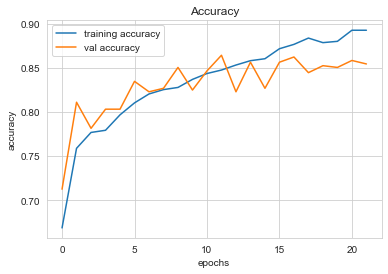

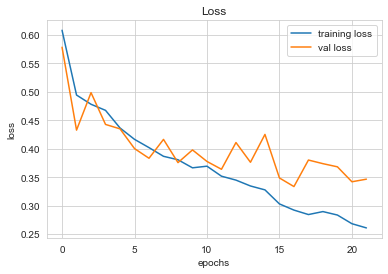

In [169]:
plt.figure(0)
plt.plot(CNN_07_model.history['accuracy'], label='training accuracy')
plt.plot(CNN_07_model.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(1)
plt.plot(CNN_07_model.history['loss'], label='training loss')
plt.plot(CNN_07_model.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

> after we did data augmentation, we reduced the overfitting

## Transfer Learning

> #### VGG16

In [35]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))

#Freeze convolutional layers
for layer in vgg_model.layers:
    layer.trainable = False
    
x = vgg_model.output
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(50, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

vgg_model = Model(inputs = vgg_model.input, outputs=predictions)
vgg_model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
vgg_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [36]:
vgg_16 = vgg_model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=20, callbacks=callbacks)

Epoch 1/20
127/127 [==============================] - ETA: 0s - loss: 1.4173 - accuracy: 0.8469
Epoch 00001: val_accuracy did not improve from 0.92717
127/127 [==============================] - 256s 2s/step - loss: 1.4173 - accuracy: 0.8469 - val_loss: 0.5144 - val_accuracy: 0.9035 - lr: 0.0010
Epoch 2/20
127/127 [==============================] - ETA: 0s - loss: 0.4436 - accuracy: 0.9033
Epoch 00002: val_accuracy did not improve from 0.92717
127/127 [==============================] - 253s 2s/step - loss: 0.4436 - accuracy: 0.9033 - val_loss: 0.3012 - val_accuracy: 0.9232 - lr: 0.0010
Epoch 3/20
127/127 [==============================] - ETA: 0s - loss: 0.3158 - accuracy: 0.9198
Epoch 00003: val_accuracy did not improve from 0.92717
127/127 [==============================] - 253s 2s/step - loss: 0.3158 - accuracy: 0.9198 - val_loss: 0.2865 - val_accuracy: 0.9094 - lr: 0.0010
Epoch 4/20
127/127 [==============================] - ETA: 0s - loss: 0.1985 - accuracy: 0.9375
Epoch 00004: val

>> ##### plotting for VGG16 (accuracy & loss)

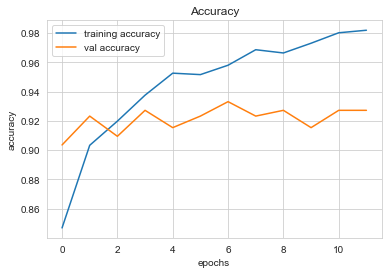

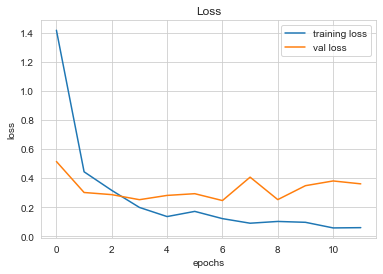

In [37]:
plt.figure(0)
plt.plot(vgg_16.history['accuracy'], label='training accuracy')
plt.plot(vgg_16.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(1)
plt.plot(vgg_16.history['loss'], label='training loss')
plt.plot(vgg_16.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

> #### VGG19

In [25]:
vgg_model_19 = VGG19(weights='imagenet', include_top=False, input_shape=(128,128,3))

#Freeze convolutional layers
for layer in vgg_model_19.layers:
    layer.trainable = False
    
x = vgg_model_19.output
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(50, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

vgg_model_19 = Model(inputs = vgg_model_19.input, outputs=predictions)
vgg_model_19.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
vgg_model_19.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [27]:
vgg_19 = vgg_model_19.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=20, callbacks=callbacks)

Epoch 1/20
127/127 [==============================] - ETA: 0s - loss: 1.6613 - accuracy: 0.8324
Epoch 00001: val_accuracy improved from -inf to 0.90748, saving model to best_model.hdf5
127/127 [==============================] - 300s 2s/step - loss: 1.6613 - accuracy: 0.8324 - val_loss: 0.4434 - val_accuracy: 0.9075 - lr: 0.0010
Epoch 2/20
127/127 [==============================] - ETA: 0s - loss: 0.3895 - accuracy: 0.8903
Epoch 00002: val_accuracy improved from 0.90748 to 0.90945, saving model to best_model.hdf5
127/127 [==============================] - 319s 3s/step - loss: 0.3895 - accuracy: 0.8903 - val_loss: 0.2731 - val_accuracy: 0.9094 - lr: 0.0010
Epoch 3/20
127/127 [==============================] - ETA: 0s - loss: 0.2247 - accuracy: 0.9193
Epoch 00003: val_accuracy did not improve from 0.90945
127/127 [==============================] - 322s 3s/step - loss: 0.2247 - accuracy: 0.9193 - val_loss: 0.2736 - val_accuracy: 0.9035 - lr: 0.0010
Epoch 4/20
127/127 [=====================

>> ##### plotting for VGG19 (accuracy & loss)

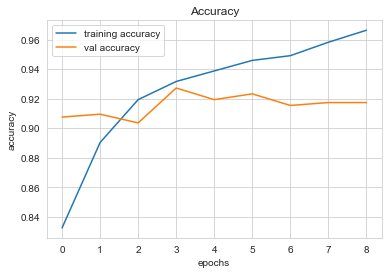

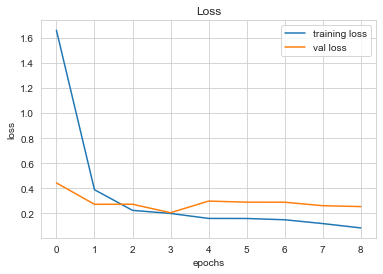

In [28]:
plt.figure(0)
plt.plot(vgg_19.history['accuracy'], label='training accuracy')
plt.plot(vgg_19.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(1)
plt.plot(vgg_19.history['loss'], label='training loss')
plt.plot(vgg_19.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

> #### InceptionV3

In [29]:
Incep_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128,128,3))

#Freeze convolutional layers
for layer in Incep_model.layers:
    layer.trainable = False
    
x = Incep_model.output
x = Flatten()(x)
x = Dense(200, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(100, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

Incep_model = Model(inputs = Incep_model.input, outputs=predictions)
Incep_model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
Incep_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 63, 63, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 63, 63, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                            

In [30]:
incep = Incep_model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=20, callbacks=callbacks)

Epoch 1/20
127/127 [==============================] - ETA: 0s - loss: 25.5140 - accuracy: 0.5554
Epoch 00001: val_accuracy did not improve from 0.92717
127/127 [==============================] - 61s 448ms/step - loss: 25.5140 - accuracy: 0.5554 - val_loss: 1.0358 - val_accuracy: 0.6358 - lr: 0.0010
Epoch 2/20
127/127 [==============================] - ETA: 0s - loss: 0.6961 - accuracy: 0.6270
Epoch 00002: val_accuracy did not improve from 0.92717
127/127 [==============================] - 56s 437ms/step - loss: 0.6961 - accuracy: 0.6270 - val_loss: 0.6218 - val_accuracy: 0.6358 - lr: 0.0010
Epoch 3/20
127/127 [==============================] - ETA: 0s - loss: 0.6494 - accuracy: 0.6048
Epoch 00003: val_accuracy did not improve from 0.92717
127/127 [==============================] - 55s 434ms/step - loss: 0.6494 - accuracy: 0.6048 - val_loss: 0.6247 - val_accuracy: 0.6339 - lr: 0.0010
Epoch 4/20
127/127 [==============================] - ETA: 0s - loss: 0.6614 - accuracy: 0.5972
Epoch 00

>> ##### plotting for InceptionV3 (accuracy & loss)

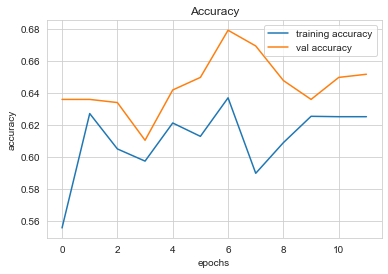

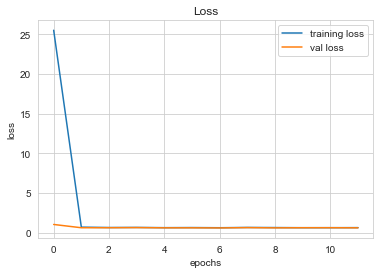

In [31]:
plt.figure(0)
plt.plot(incep.history['accuracy'], label='training accuracy')
plt.plot(incep.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(1)
plt.plot(incep.history['loss'], label='training loss')
plt.plot(incep.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

> #### MobileNetV2

In [32]:
mn2_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3))

#Freeze convolutional layers
for layer in mn2_model.layers:
    layer.trainable = False
    
x = mn2_model.output
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(50, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

mn2_model = Model(inputs = mn2_model.input, outputs=predictions)
mn2_model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
mn2_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_3[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']         

In [33]:
mobilev2 = mn2_model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=20, callbacks=callbacks)

Epoch 1/20
127/127 [==============================] - ETA: 0s - loss: 0.7803 - accuracy: 0.7015
Epoch 00001: val_accuracy did not improve from 0.92717
127/127 [==============================] - 33s 241ms/step - loss: 0.7803 - accuracy: 0.7015 - val_loss: 0.4116 - val_accuracy: 0.8268 - lr: 0.0010
Epoch 2/20
127/127 [==============================] - ETA: 0s - loss: 0.4376 - accuracy: 0.7921
Epoch 00002: val_accuracy did not improve from 0.92717
127/127 [==============================] - 28s 221ms/step - loss: 0.4376 - accuracy: 0.7921 - val_loss: 0.3938 - val_accuracy: 0.8130 - lr: 0.0010
Epoch 3/20
127/127 [==============================] - ETA: 0s - loss: 0.3857 - accuracy: 0.8248
Epoch 00003: val_accuracy did not improve from 0.92717
127/127 [==============================] - 28s 217ms/step - loss: 0.3857 - accuracy: 0.8248 - val_loss: 0.4393 - val_accuracy: 0.7854 - lr: 0.0010
Epoch 4/20
127/127 [==============================] - ETA: 0s - loss: 0.3785 - accuracy: 0.8243
Epoch 0000

>> ##### plotting for MobileNetV2 (accuracy & loss)

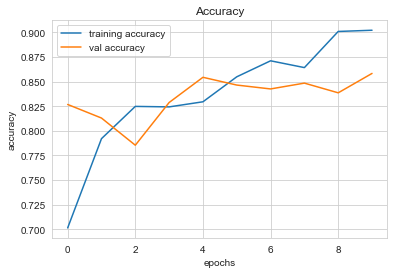

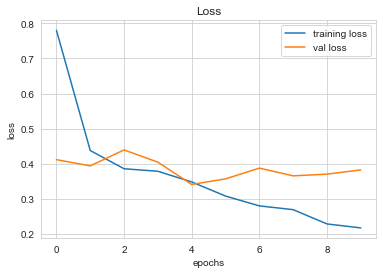

In [34]:
plt.figure(0)
plt.plot(mobilev2.history['accuracy'], label='training accuracy')
plt.plot(mobilev2.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(1)
plt.plot(mobilev2.history['loss'], label='training loss')
plt.plot(mobilev2.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

### Loading the best model

In [38]:
from keras.models import load_model
model = load_model('best_model.hdf5')

### test our model and build a pipe

In [39]:
print('Accuracy of our model on test data: ', model.evaluate(X_test,y_test)[1]*100,'%')

16/16 [==============================] - 26s 2s/step - loss: 0.1849 - accuracy: 0.9429
Accuracy of our model on test data:  94.29134130477905 %


In [59]:
def damage(image_path, model):
    urllib.request.urlretrieve(image_path, 'save.jpg')
    img = load_img('save.jpg', target_size=(128,128))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)/255
    pred = model.predict(x)
    print("Validating that damage exists....")
    if(pred[0][0]<=0.5):
        print("Validation complete - the car is damaged, proceed to location and severity determination")
    else:
        print ("Are you sure that your car is damaged? Please submit another picture of the damage.")
        print ("Hint: Try zooming in/out, using a different angle or different lighting")   

## Try our model with damaged car

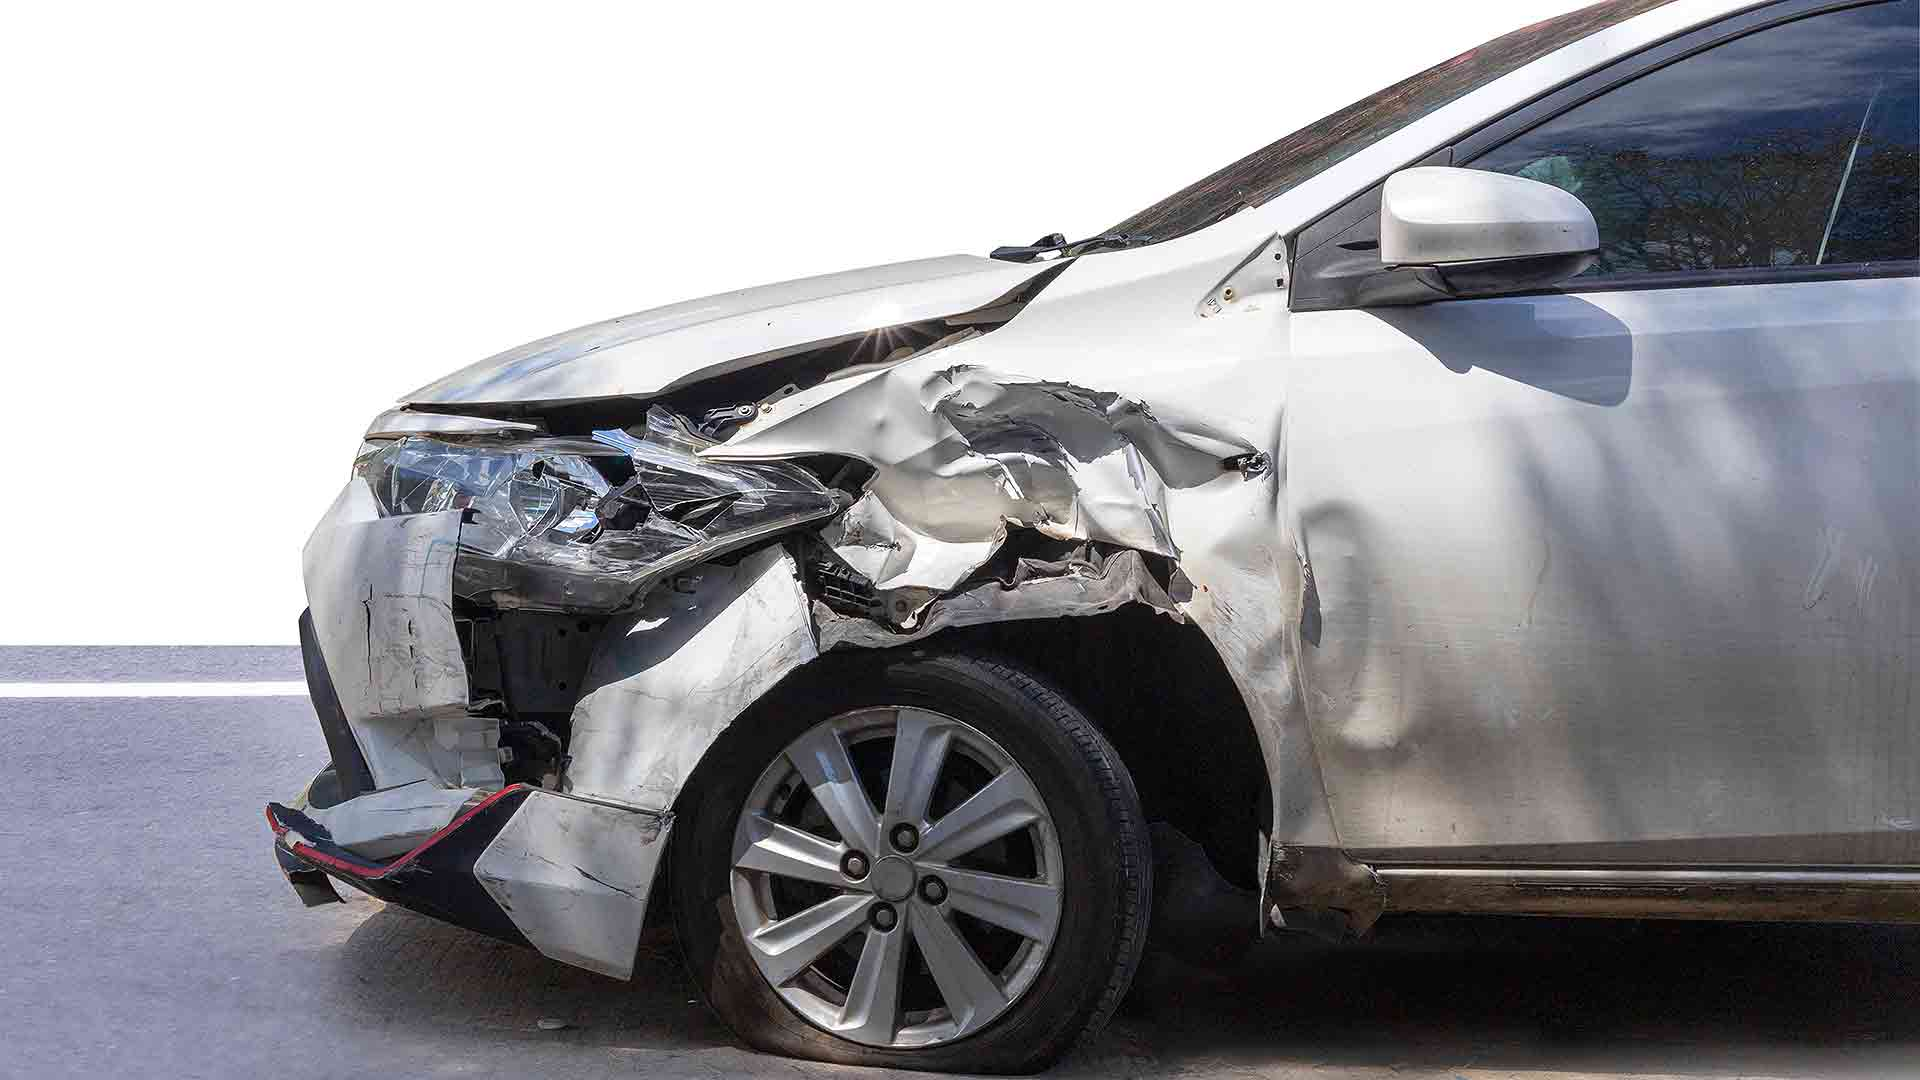

In [51]:
Image('https://www.motoringresearch.com/wp-content/uploads/2021/01/Damaged-car-sml.jpg')

In [61]:
damage('https://www.motoringresearch.com/wp-content/uploads/2021/01/Damaged-car-sml.jpg', model)

Validating that damage exists....
Validation complete - the car is damaged, proceed to location and severity determination


## Try our model with not damaged car

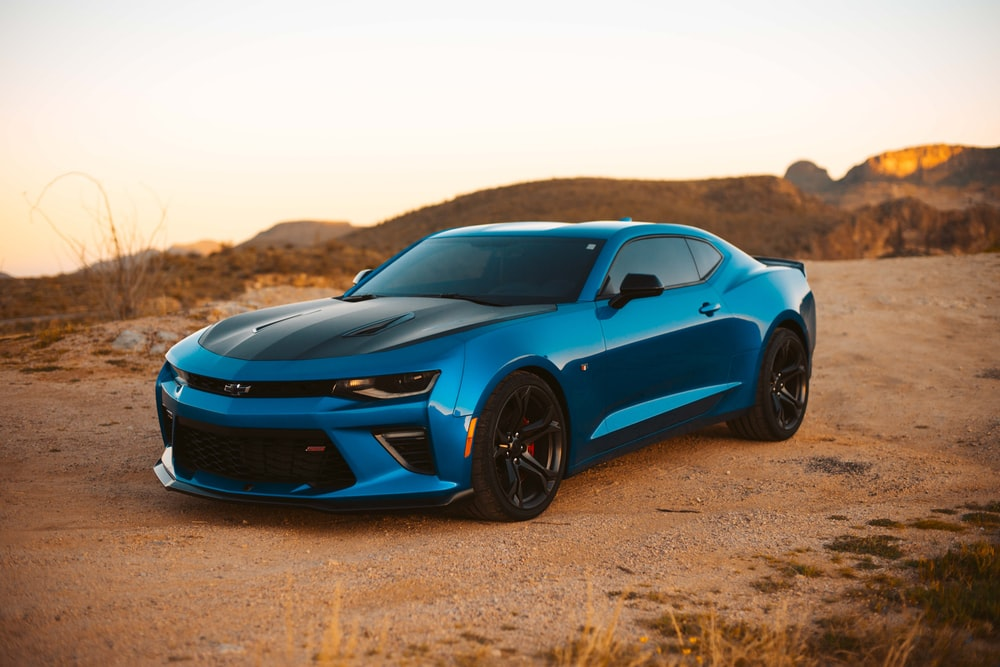

In [57]:
Image('https://www.1auto.co/storage/ready_for_sales/20211028140344_photo-1552519507-da3b142c6e3d.jpg')

In [60]:
damage('https://www.1auto.co/storage/ready_for_sales/20211028140344_photo-1552519507-da3b142c6e3d.jpg', model)

Validating that damage exists....
Are you sure that your car is damaged? Please submit another picture of the damage.
Hint: Try zooming in/out, using a different angle or different lighting
